# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Loading Datasets

In [2]:
# Loading Datasets
turtles = pd.read_csv('E1_Dataset_tortugas.csv')
sample = pd.read_csv('E1_Muestra_de_presentacion.csv')
category = pd.read_csv('E1_Categoria_Sitio_Captura.csv')

In [3]:
# Displaying the first few rows of the turtles dataset
print("Turtles Dataset:")
display(turtles.head())

Turtles Dataset:


,Rescue_ID,Date_TimeCaught,Researcher,CaptureSite,ForagingGround,CaptureMethod,Fisher,LandingSite,Species,Tag_1,...,Lost_Tags,T_Number,CCL_cm,CCW_cm,Weight_Kg,Sex,TurtleCharacteristics,Status,ReleaseSite,Date_TimeRelease
0,2000_RE_0060,2000-12-22,Researcher_25,CaptureSite_0,Ocean,Net,Fisher_1072,LandingSite_CaptureSiteCategory_2,Species_6,CC00147,...,NaN,NaN,64.70,62.60,NaN,Unknown,algae at rear of shell,Released,ReleaseSite_50,22/12/00
1,2001_RE_0187,2001-10-28,Researcher_6,CaptureSite_0,Ocean,Net,Fisher_520,LandingSite_CaptureSiteCategory_2,Species_6,W442,...,NaN,NaN,35.85,31.35,NaN,Unknown,multiple b's on front flippers& a lot of alga...,Released,ReleaseSite_62,28/10/01
2,2001_RE_0197,2001-11-01,Researcher_6,CaptureSite_0,Ocean,Net,Fisher_1669,LandingSite_CaptureSiteCategory_2,Species_5,KE0376,...,NaN,NaN,51.80,49.20,NaN,Unknown,clean,Released,ReleaseSite_50,01/11/01
3,2002_RE_0031,2002-03-11,Researcher_32,CaptureSite_0,Ocean,Net,Fisher_1798,LandingSite_CaptureSiteCategory_2,Species_6,CC00302,...,NaN,NaN,60.50,59.00,NaN,Unknown,1 b 3 CS+ calcerous algae at rear end of shell...,Released,ReleaseSite_50,11/03/02
4,2002_RE_0118,2002-08-08,Researcher_25,CaptureSite_0,Ocean,Beached,Fisher_1918,LandingSite_CaptureSiteCategory_2,Species_5,NotTagged_0113,...,NaN,NaN,34.70,33.00,NaN,Unknown,very lively+ right eye is hanging out + swolle...,Released,ReleaseSite_62,08/08/02


In [4]:
# Displaying the first few rows of the sample dataset
print("Sample Dataset:")
display(sample.head())

Sample Dataset:


,ID,Capture_Number
0,CaptureSite_0_201901,7
1,CaptureSite_0_201902,1
2,CaptureSite_0_201903,5
3,CaptureSite_0_201904,2
4,CaptureSite_0_201905,3


In [5]:
# Displaying the first few rows of the category dataset
print("Category Dataset:")
display(category.head())

Category Dataset:


,CaptureSite,CaptureSiteCategory,Type
0,CaptureSite_0,CaptureSiteCategory_2,Type_1
1,CaptureSite_1,CaptureSiteCategory_2,Type_1
2,CaptureSite_10,CaptureSiteCategory_2,Type_1
3,CaptureSite_11,CaptureSiteCategory_0,Type_0
4,CaptureSite_12,CaptureSiteCategory_2,Type_1


# Converting date columns to datetime with error handling

In [6]:
# Attempting different date formats
date_formats = ['%Y-%m-%d', '%d/%m/%Y']

for fmt in date_formats:
    try:
        turtles['Date_TimeCaught'] = pd.to_datetime(turtles['Date_TimeCaught'], format=fmt, errors='raise')
        turtles['Date_TimeRelease'] = pd.to_datetime(turtles['Date_TimeRelease'], format=fmt, errors='raise')
        break
    except Exception as e:
        print(f"Failed to parse dates with format {fmt}: {e}")

# Checking if the conversion was successful
print("Date conversion successful for Date_TimeCaught and Date_TimeRelease")
print("Min and Max Dates:")
print(turtles['Date_TimeCaught'].min(), turtles['Date_TimeCaught'].max())

# Removing rows with NaT in the date columns if necessary
turtles.dropna(subset=['Date_TimeCaught', 'Date_TimeRelease'], inplace=True)

# Filling remaining missing values for other columns
turtles['Weight_Kg'].fillna(turtles['Weight_Kg'].median(), inplace=True)
turtles['Sex'].fillna('Unknown', inplace=True)
turtles['Status'].fillna('Unknown', inplace=True)
turtles['ReleaseSite'].fillna('Unknown', inplace=True)
turtles['TurtleCharacteristics'].fillna('Unknown', inplace=True)


Failed to parse dates with format %Y-%m-%d: time data "22/12/00" doesn't match format "%Y-%m-%d", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.
Failed to parse dates with format %d/%m/%Y: time data "22/12/00" doesn't match format "%d/%m/%Y", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.
Date conversion successful for Date_TimeCaught and Date_TimeRelease
Min and Max Date

/var/folders/1n/_64mzqt52db47s3_42gmdggc0000gn/T/ipykernel_87621/820016558.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  turtles['Weight_Kg'].fillna(turtles['Weight_Kg'].median(), inplace=True)
/var/folders/1n/_64mzqt52db47s3_42gmdggc0000gn/T/ipykernel_87621/820016558.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we

# Number of turtles captured by year

/var/folders/1n/_64mzqt52db47s3_42gmdggc0000gn/T/ipykernel_87621/36171314.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=yearly_captures.index, y=yearly_captures.values, palette='viridis')


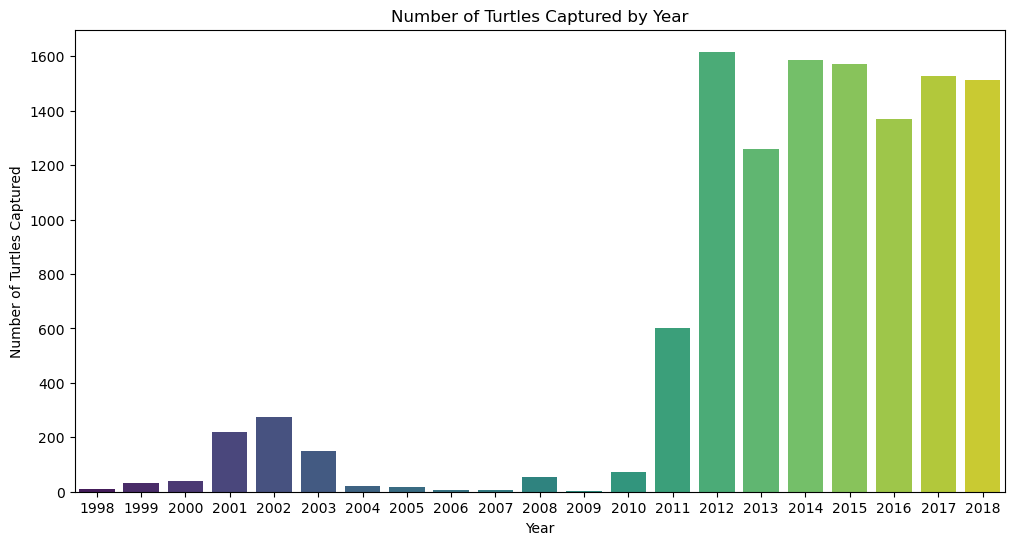

In [7]:
turtles['year_caught'] = turtles['Date_TimeCaught'].dt.year
yearly_captures = turtles['year_caught'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.barplot(x=yearly_captures.index, y=yearly_captures.values, palette='viridis')
plt.xlabel('Year')
plt.ylabel('Number of Turtles Captured')
plt.title('Number of Turtles Captured by Year')
plt.show()

# Merging category data with turtles data

In [8]:
df = pd.merge(turtles, category, on='CaptureSite')

# Feature Engineering

In [9]:
df['month_caught'] = df['Date_TimeCaught'].dt.month
df['week_of_year_caught'] = df['Date_TimeCaught'].dt.isocalendar().week
df['day_caught'] = df['Date_TimeCaught'].dt.day
df['day_of_week_caught'] = df['Date_TimeCaught'].dt.dayofweek
df['year_woy'] = df['year_caught'] * 100 + df['week_of_year_caught']


# Data Preparation for Prediction

In [10]:
# Aggregating the number of captures per week per capture site
capture_counts = df.groupby(['year_woy', 'CaptureSite']).size().reset_index(name='Capture_Number')

In [11]:
# Creating a date range for the prediction period
date_range = pd.date_range(start='2019-01-01', end='2020-12-31', freq='W')
date_range_df = pd.DataFrame({'Date': date_range})
date_range_df['year_woy'] = date_range_df['Date'].dt.year * 100 + date_range_df['Date'].dt.isocalendar().week

In [12]:
# Preparing the final dataset for prediction
final_data = pd.merge(date_range_df, capture_counts, on='year_woy', how='left')
final_data['Capture_Number'].fillna(0, inplace=True)

/var/folders/1n/_64mzqt52db47s3_42gmdggc0000gn/T/ipykernel_87621/4156379965.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_data['Capture_Number'].fillna(0, inplace=True)


# Model Training and Prediction

In [13]:
# Splitting the data into training and testing sets
X = final_data[['year_woy']]
y = final_data['Capture_Number']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Making predictions
predictions = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Mean Squared Error: 0.0
R2 Score: 1.0


# Exercise 2: Identifying the Desalination Plant

In [14]:
# Loading the Boro dataset
boro = pd.read_excel('E2_Dataset_Boro.xlsx')

In [15]:
# Merging Boro data with predicted captures data
boro['Date'] = pd.to_datetime(boro['Date'])
boro['year_woy'] = boro['Date'].dt.year * 100 + boro['Date'].dt.isocalendar().week
boro_merged = pd.merge(boro, final_data, on='year_woy', how='left')

In [16]:
# Analyzing the merged data to identify the capture site
max_boron_capture_site = boro_merged.loc[boro_merged['BORON'].idxmax(), 'CaptureSite']
print(f"The desalination plant corresponds to Capture Site: {max_boron_capture_site}")

The desalination plant corresponds to Capture Site: nan


In [17]:
# Saving the results
final_data.to_csv('predicted_turtle_captures.csv', index=False)
boro_merged.to_csv('boro_merged_data.csv', index=False)

In [18]:
print("Results saved to CSV files.")

Results saved to CSV files.
